cross validation mae (within tumor):
has margin in FDG image
original pix2pix -> 0.10897 @ 151 epochs
add SE block to the last layer -> 0.113873 @ 132 epochs
last layer SE + MSE loss -> 0.112003 @ 161 epochs
last layer SE + L1 and MSE loss within tumor region -> 0.110141 @ 101 epochs
mean k1 0.3429

no margin in FDG image:
last layer SE + L1 and MSE loss within tumor region -> 0.074986 @ 69 epochs

In [1]:
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
file_dir = './checkpoints/fdg_fmisok1_pix2pix_no_margin_fold1_l1_l2_tumor_SE'
mae_file = os.path.join(file_dir, 'mae_log.txt')
real_FDG_path = os.path.join(file_dir, 'train_real_A')
real_k1_path = os.path.join(file_dir, 'train_real_B')
fake_k1_path = os.path.join(file_dir, 'train_fake_B')
with open(mae_file) as f:
    lines = f.readlines()[1:]
    x = [int(line.split(',')[0].strip()) for line in lines]
    y = [float(line.split(',')[1].strip()) for line in lines]

In [5]:
min(y)

0.074986

In [6]:
y.index(min(y))+1

69

Text(0.5, 1.0, 'cross validation mae vs epoch')

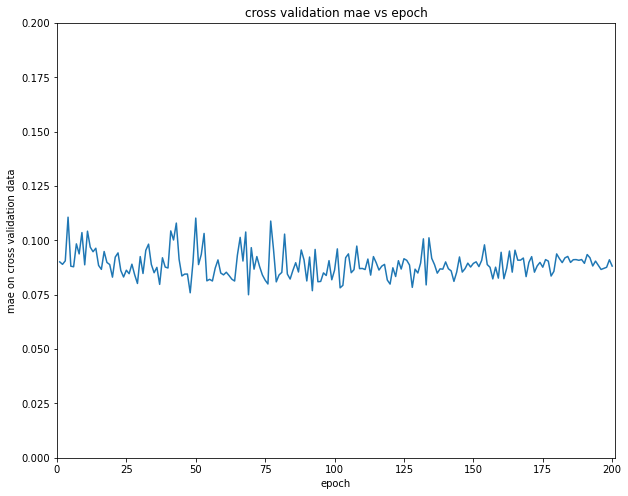

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x,y)
ax.set_xlim(0, 201)
ax.set_ylim(0, 0.2)
ax.set_xlabel('epoch')
ax.set_ylabel('mae on cross validation data')
ax.set_title('cross validation mae vs epoch')

<Figure size 432x288 with 0 Axes>

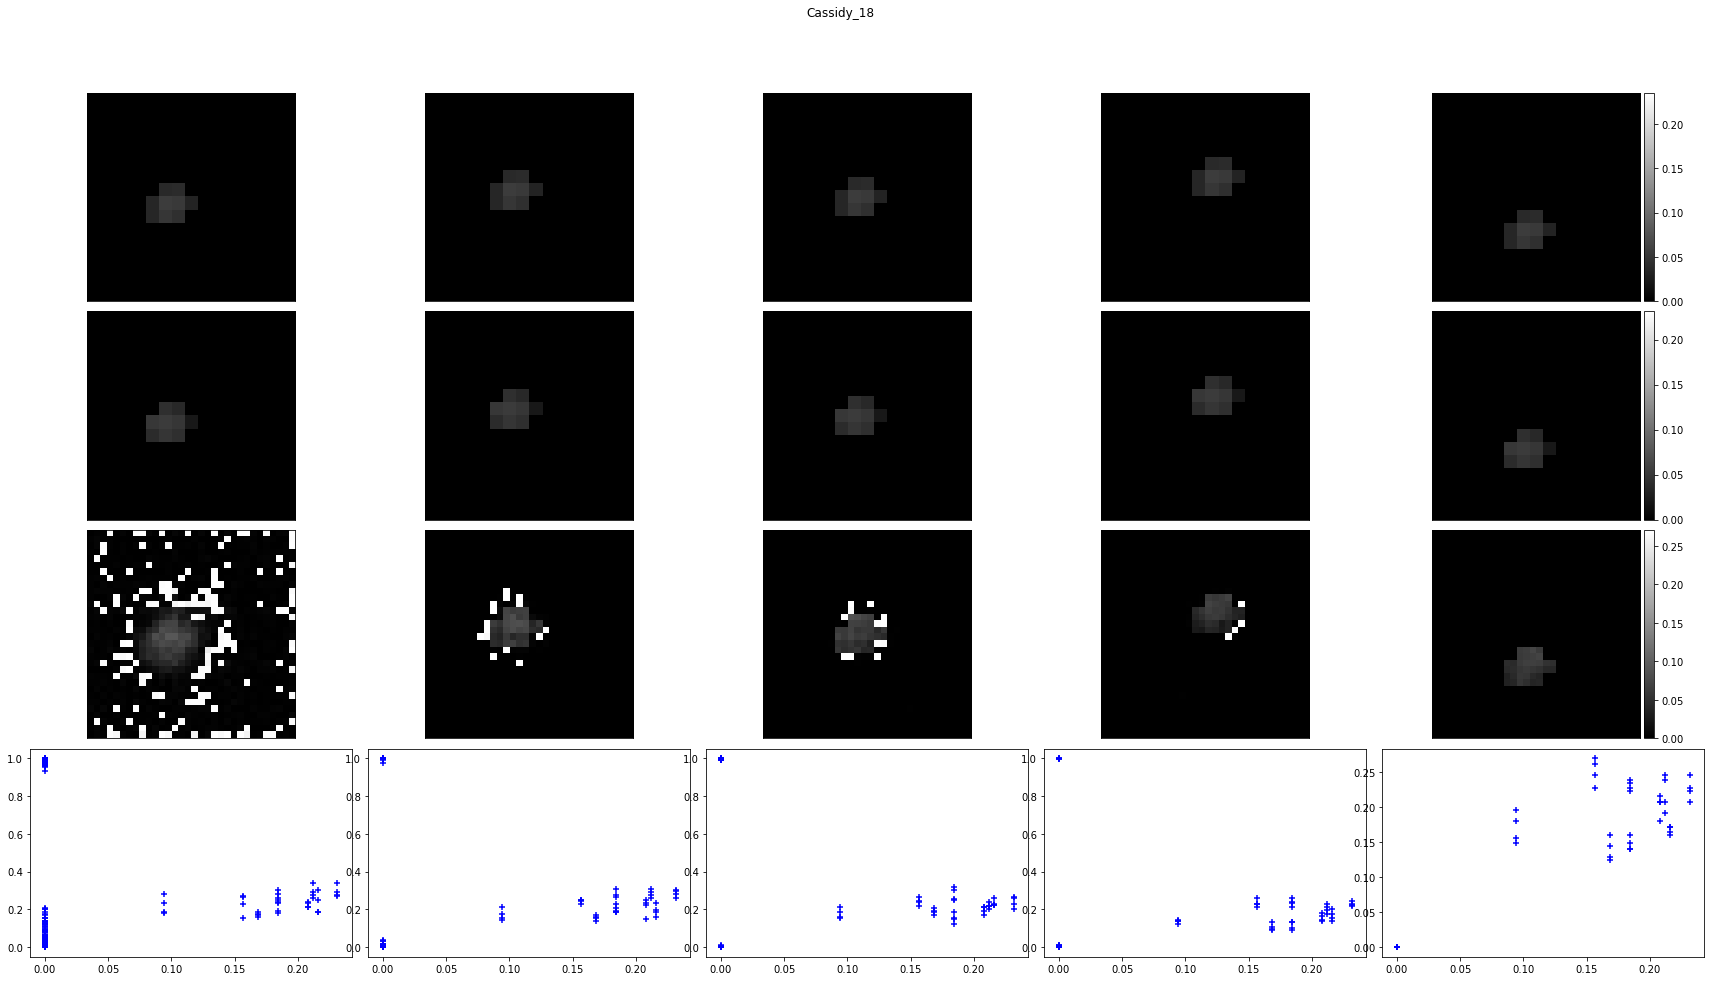

<Figure size 432x288 with 0 Axes>

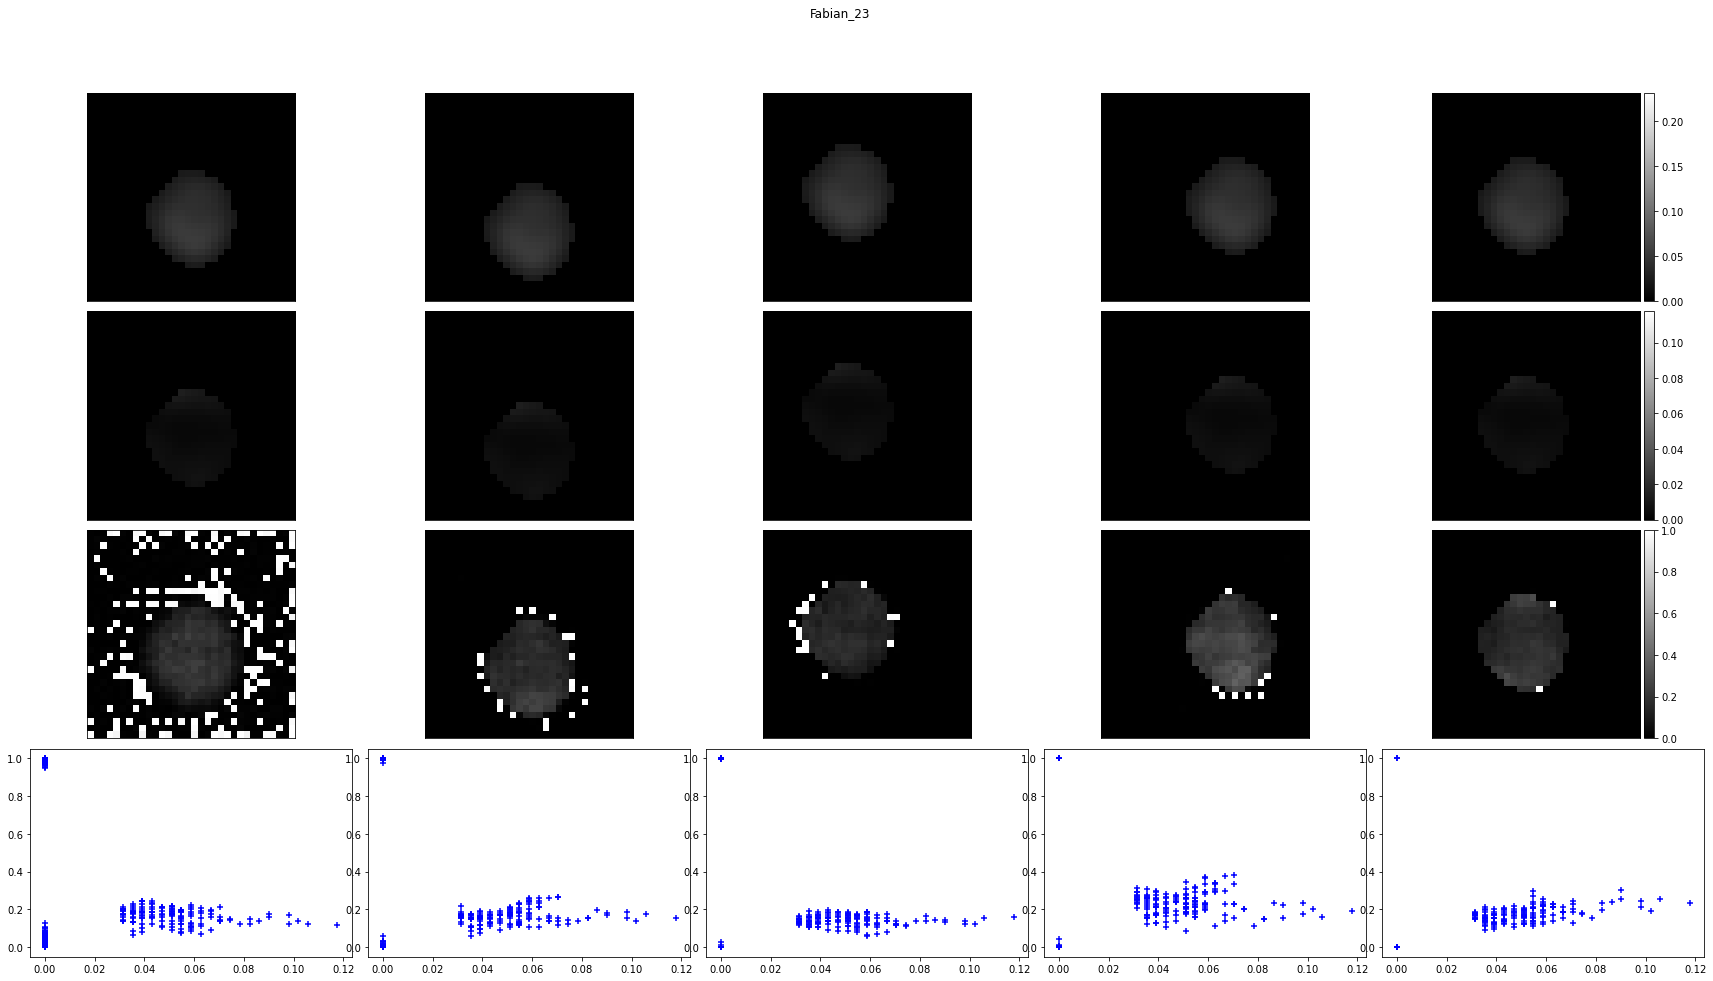

<Figure size 432x288 with 0 Axes>

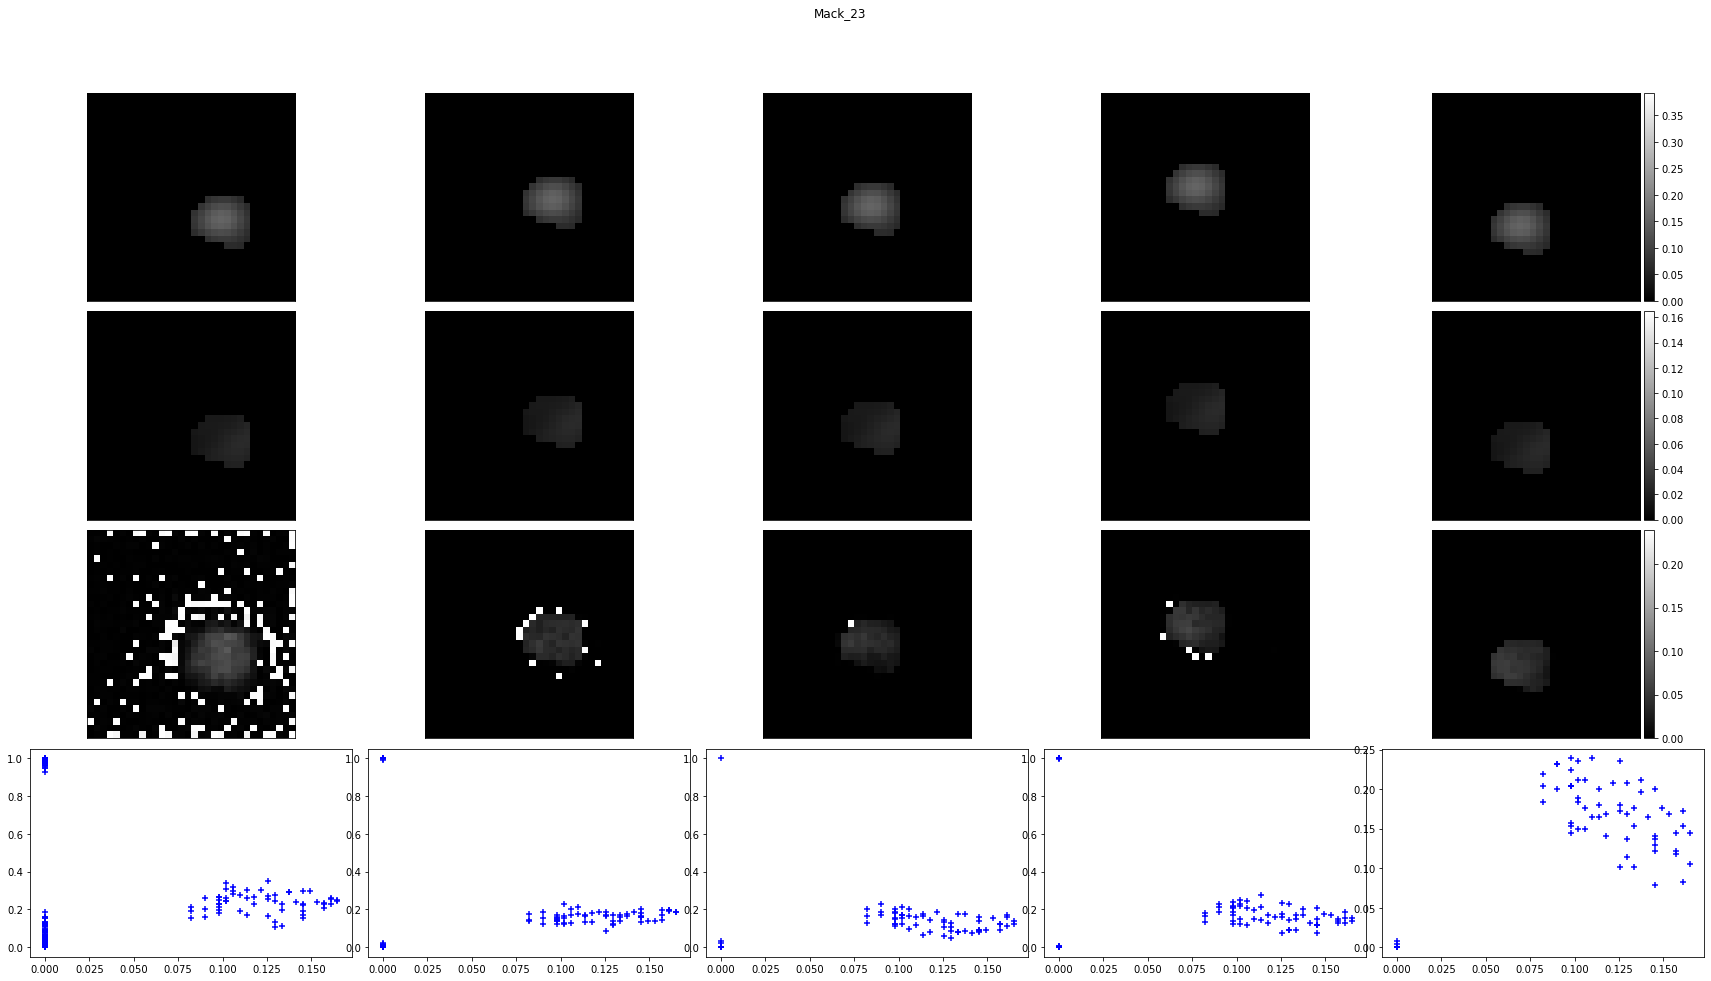

<Figure size 432x288 with 0 Axes>

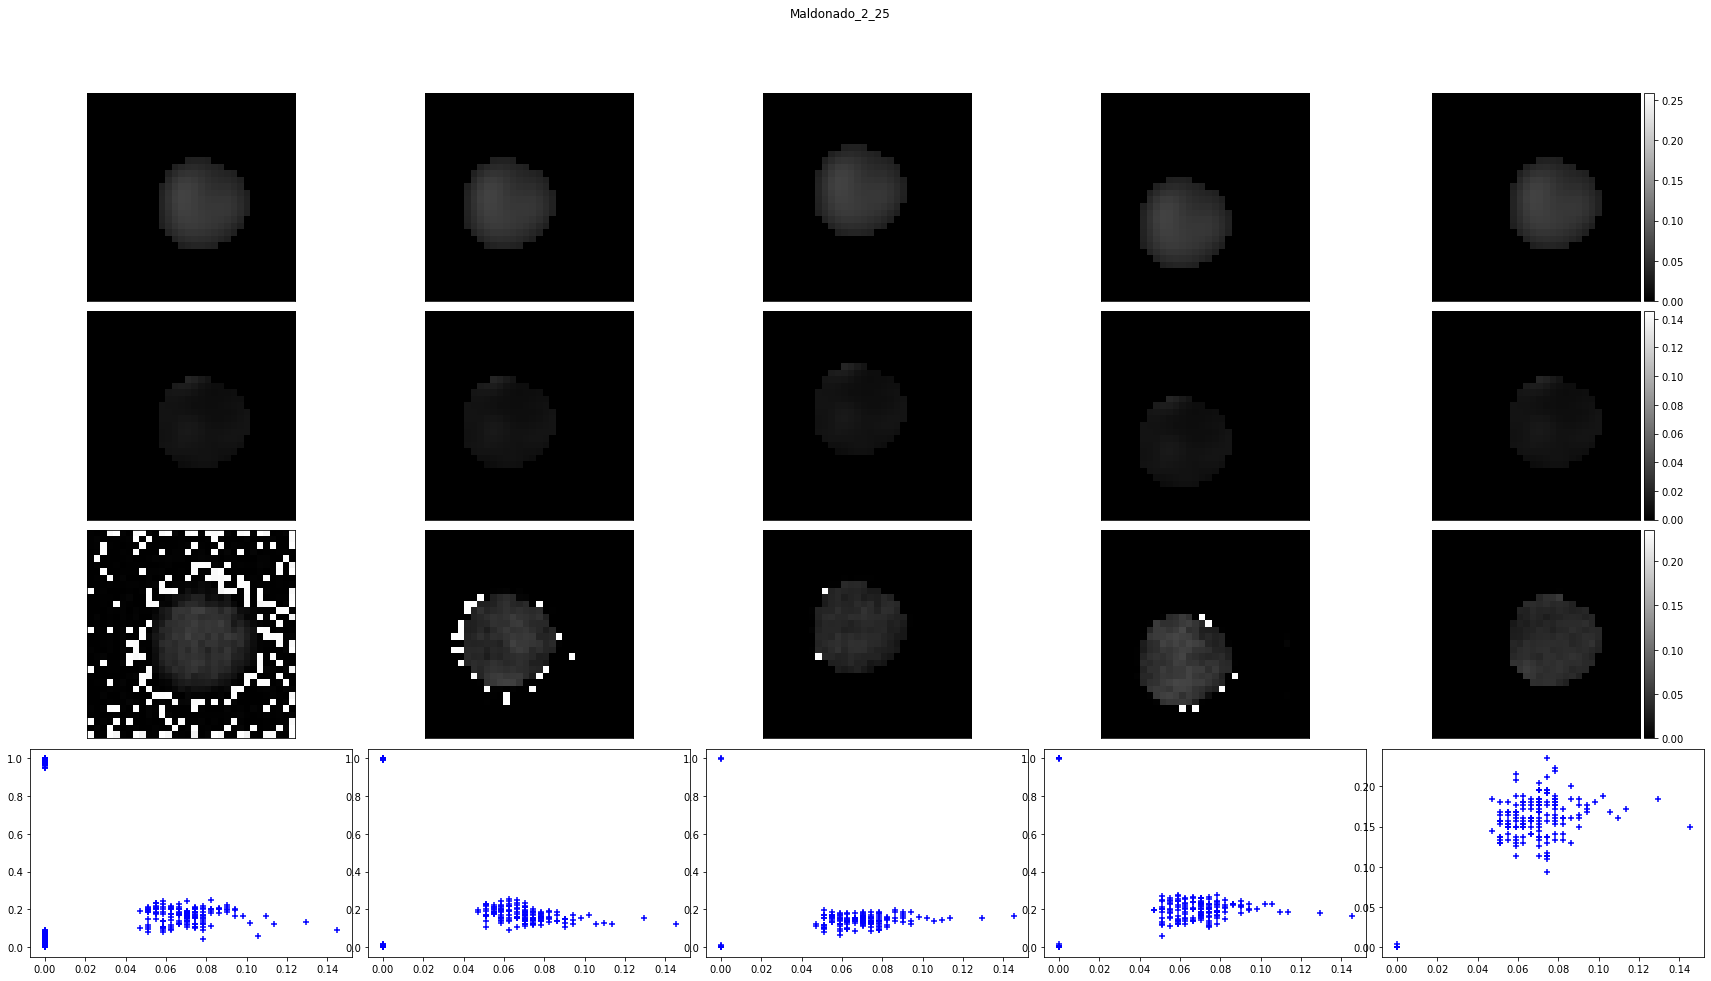

<Figure size 432x288 with 0 Axes>

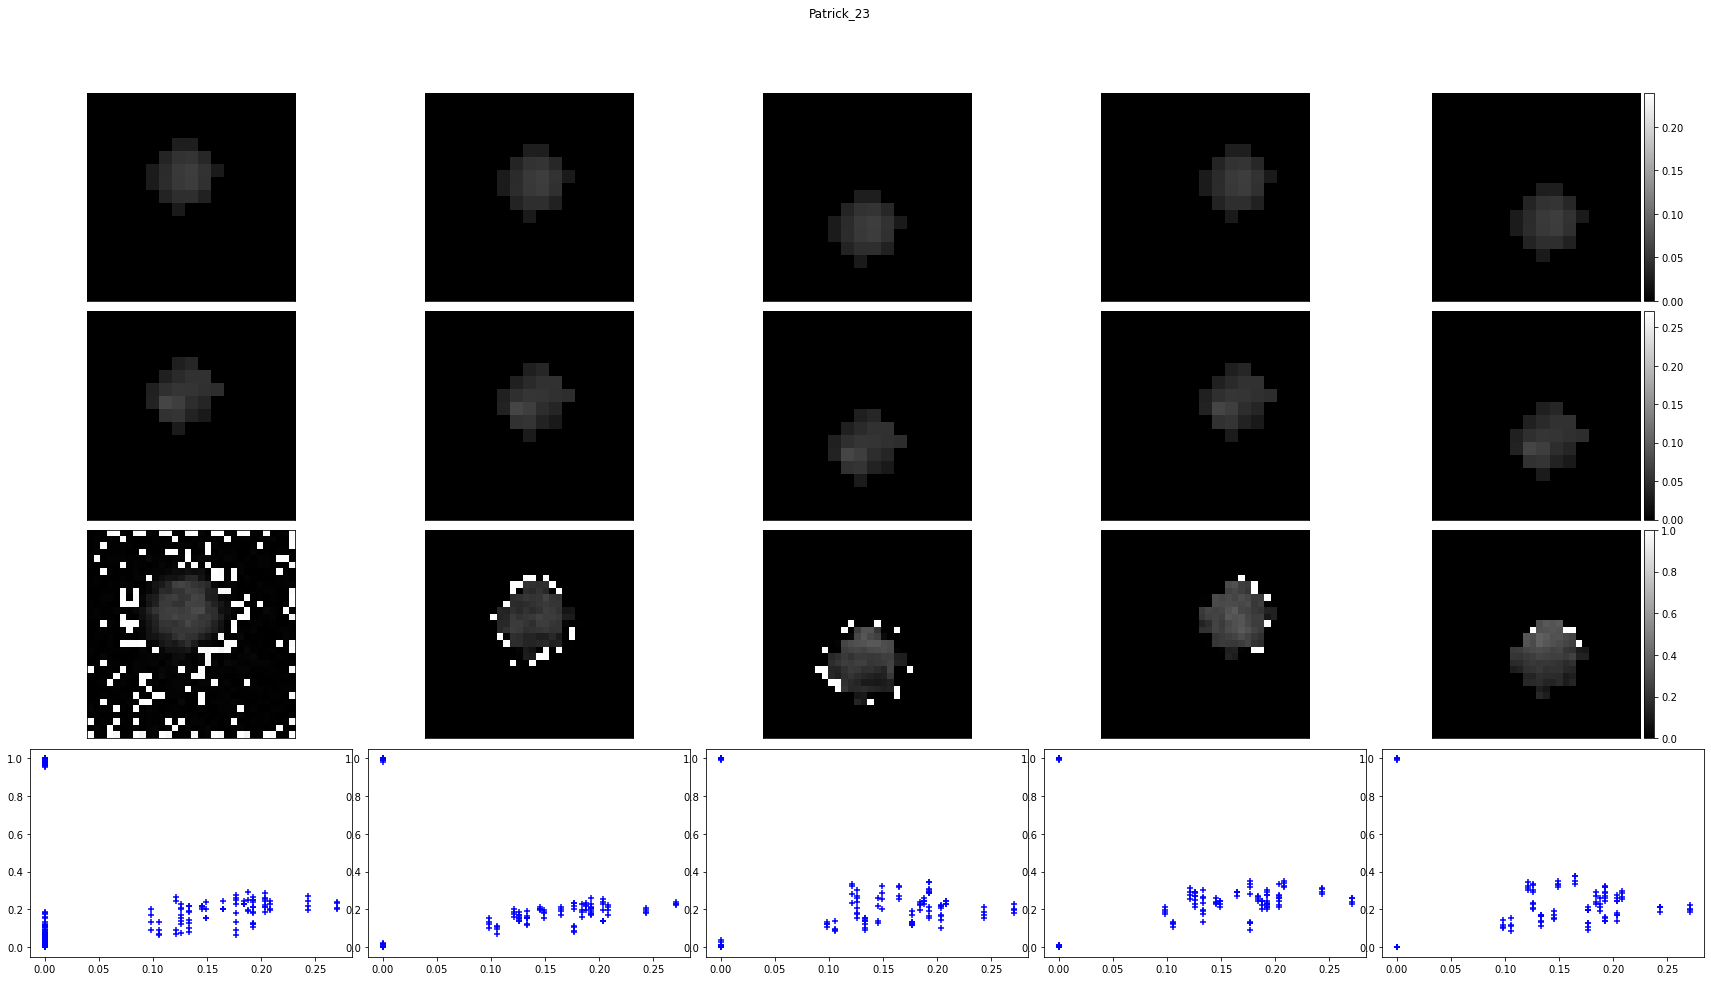

In [9]:
_, _, filenames = next(os.walk(real_k1_path), (None, None, []))
filenames.sort()
patientName = ['_'.join(x.split('_')[1:3]) if len(x.split('_')) ==6 else '_'.join(x.split('_')[1:4]) for x in filenames]
patientNameUnique = list(set(patientName))
patientNameUnique.sort()

epoch_number_to_plot = [1, 51, 71, 101, 191]
nCol = len(epoch_number_to_plot)

for patient in patientNameUnique[0::4]:
    plt.figure()
    fig, axs = plt.subplots(4, nCol, figsize=(30, 15))
    for col_id, epoch in enumerate(epoch_number_to_plot):
        name_real_FDG = os.path.join(real_FDG_path, 'FDGk1Pair_' + patient + '_real_A_epoch' + str(epoch) +'.png')
        name_real_k1 = os.path.join(real_k1_path, 'FDGk1Pair_' + patient + '_real_B_epoch' + str(epoch) +'.png')
        name_fake_k1 = os.path.join(fake_k1_path, 'FDGk1Pair_' + patient + '_fake_B_epoch' + str(epoch) +'.png')
        img_real_FDG = plt.imread(name_real_FDG)
        img_real_k1 = plt.imread(name_real_k1)
        img_fake_k1 = plt.imread(name_fake_k1)
        img_list = [img_real_FDG, img_real_k1, img_fake_k1]
        for row_id in range(4):
            ax = axs[row_id, col_id]
            if row_id < 3:
                im = ax.imshow(img_list[row_id], cmap='gray',)
                ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
                if col_id == len(epoch_number_to_plot) - 1:
                    divider = make_axes_locatable(ax)
                    cax = divider.append_axes("right", size="5%", pad=0.05)
                    # cax = plt.axes([0.85, 0.1, 0.075, 0.8])
                    fig.colorbar(im, cax=cax,)
            else:
                ax.scatter(img_list[1][:,:,0].reshape(32*32,), img_list[2][:,:,0].reshape(32*32,), c='b', marker='+',)
    fig.suptitle(patient)


    
    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.05)

In [3]:
file_dir = './checkpoints/fdg_fmisok1_pix2pix_no_margin_fold1_l1_l2_tumor_SE_16'
mae_file = os.path.join(file_dir, 'mae_log.txt')
real_FDG_path = os.path.join(file_dir, 'train_real_A')
real_k1_path = os.path.join(file_dir, 'train_real_B')
fake_k1_path = os.path.join(file_dir, 'train_fake_B')
with open(mae_file) as f:
    lines = f.readlines()[1:]
    x = [int(line.split(',')[0].strip()) for line in lines]
    y = [float(line.split(',')[1].strip()) for line in lines]

In [4]:
min(y)

0.06625

In [7]:
y.index(min(y)) +1

38

Text(0.5, 1.0, 'cross validation mae vs epoch')

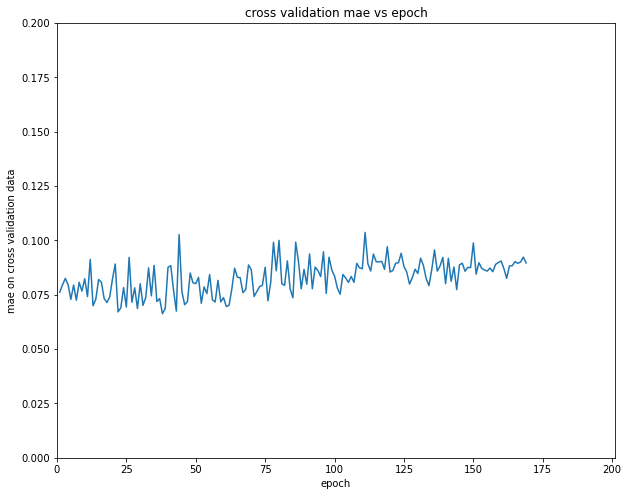

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x,y)
ax.set_xlim(0, 201)
ax.set_ylim(0, 0.2)
ax.set_xlabel('epoch')
ax.set_ylabel('mae on cross validation data')
ax.set_title('cross validation mae vs epoch')

<Figure size 432x288 with 0 Axes>

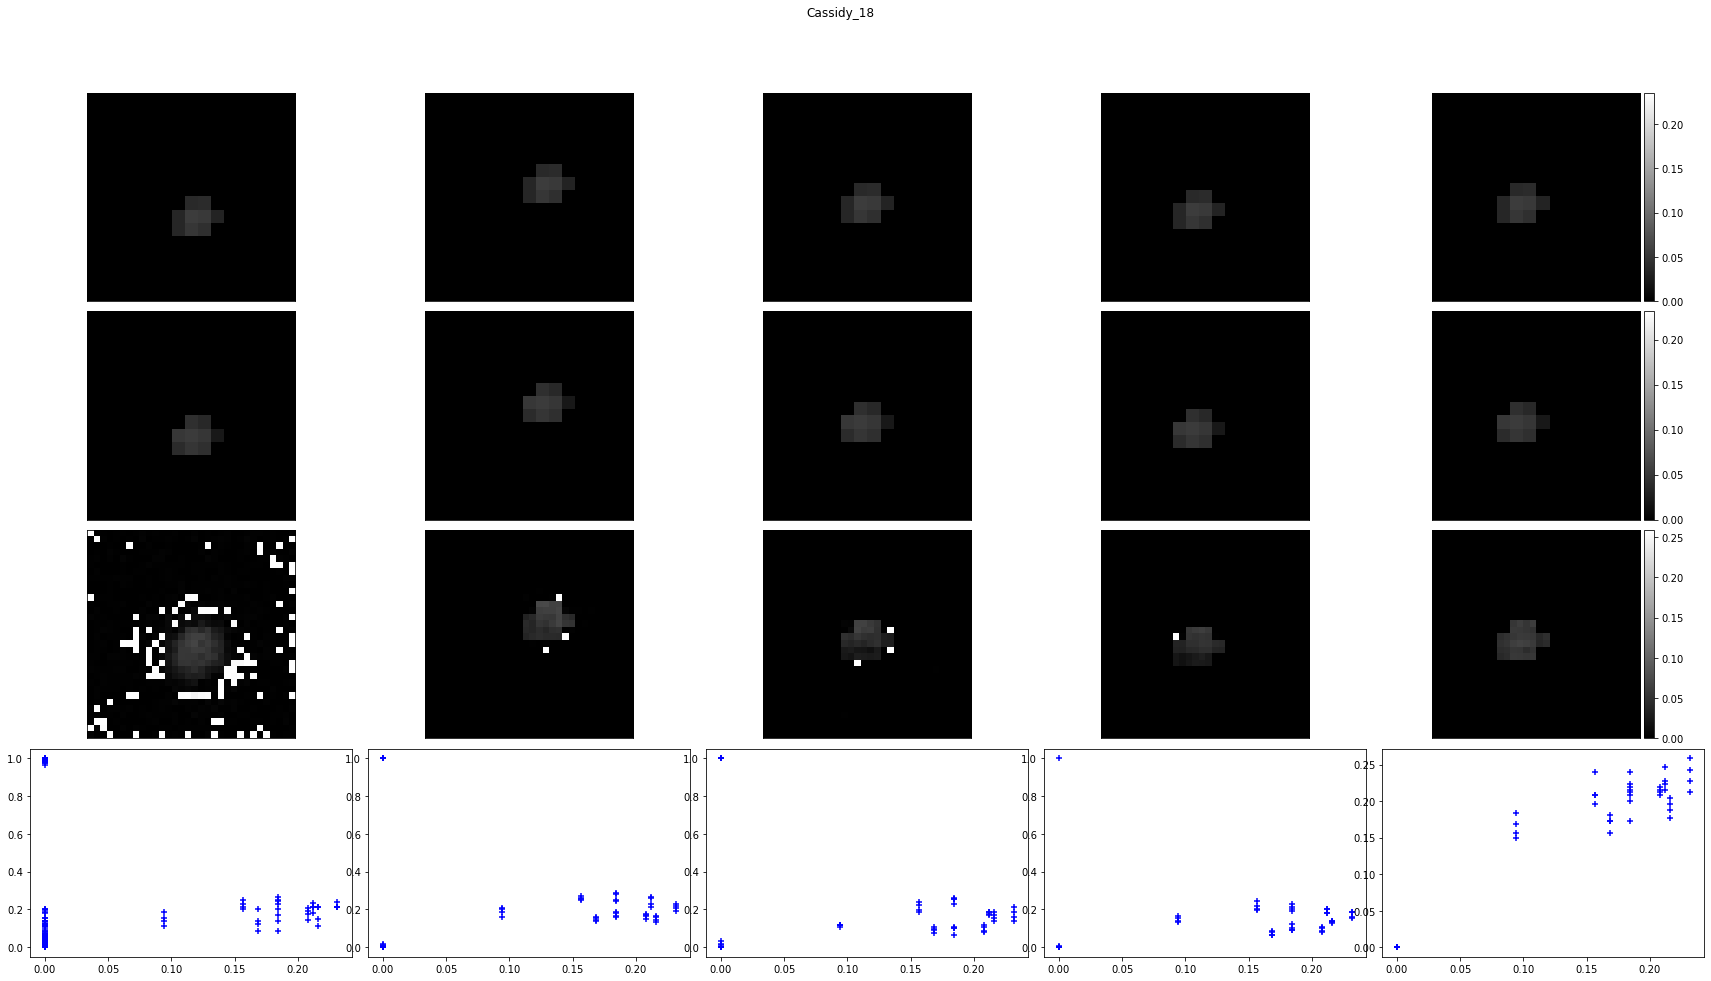

<Figure size 432x288 with 0 Axes>

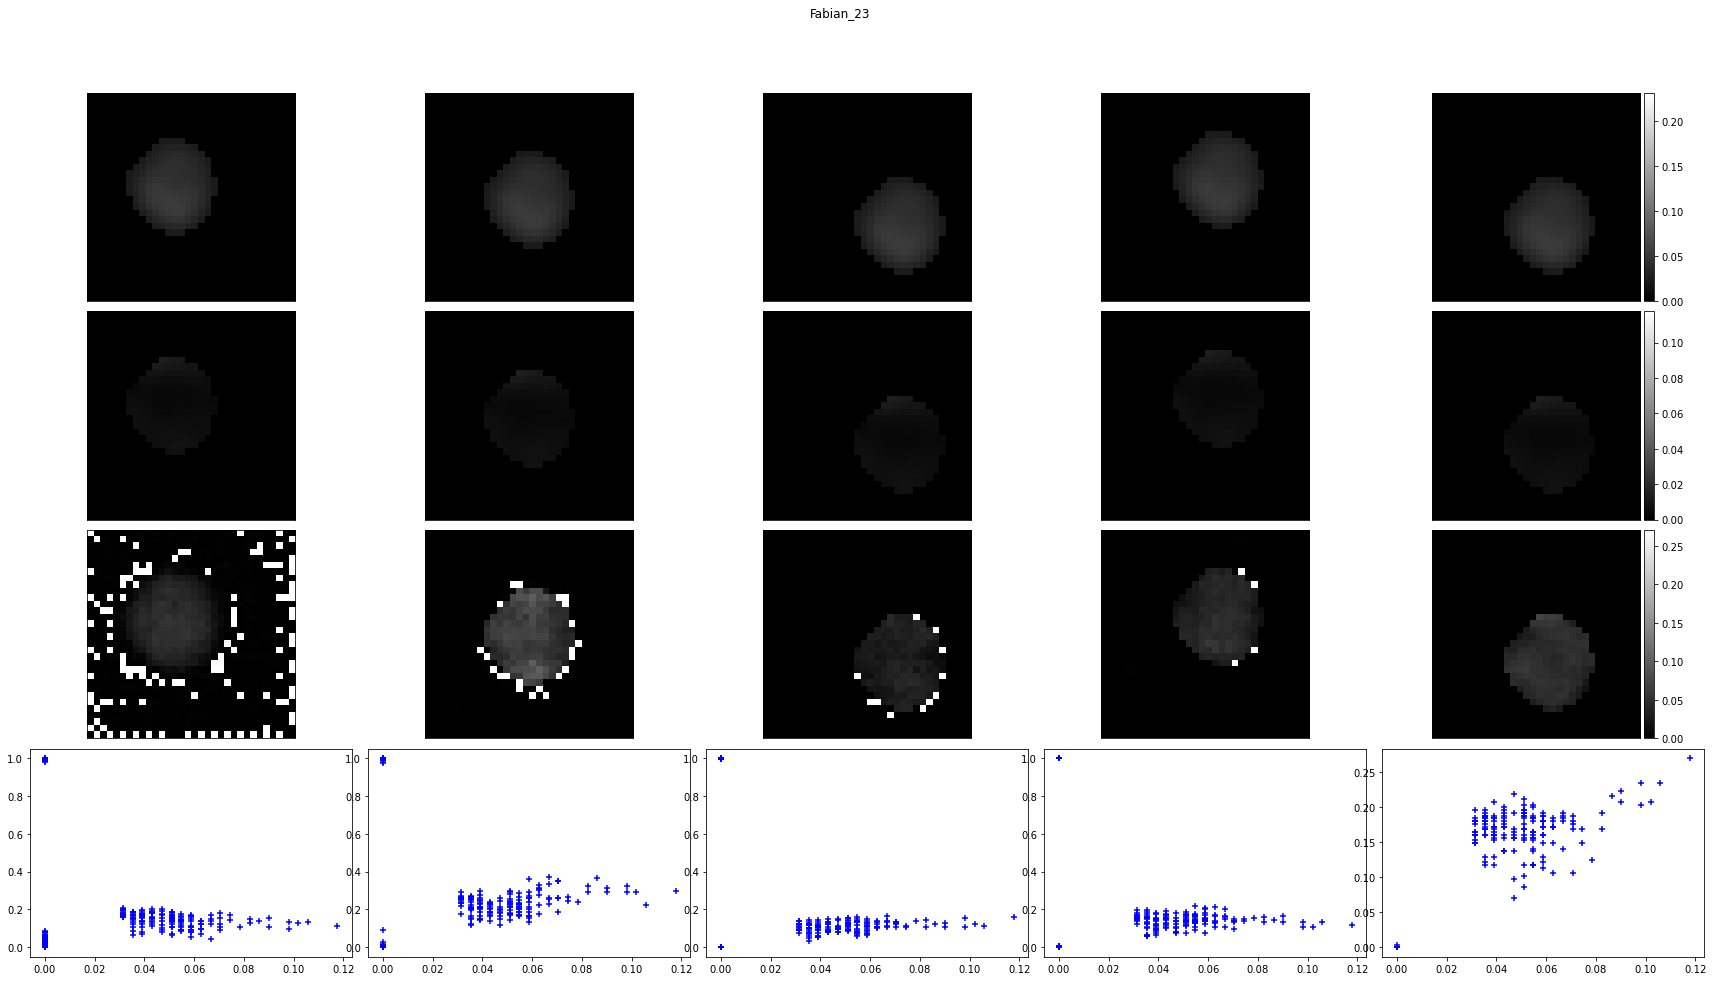

<Figure size 432x288 with 0 Axes>

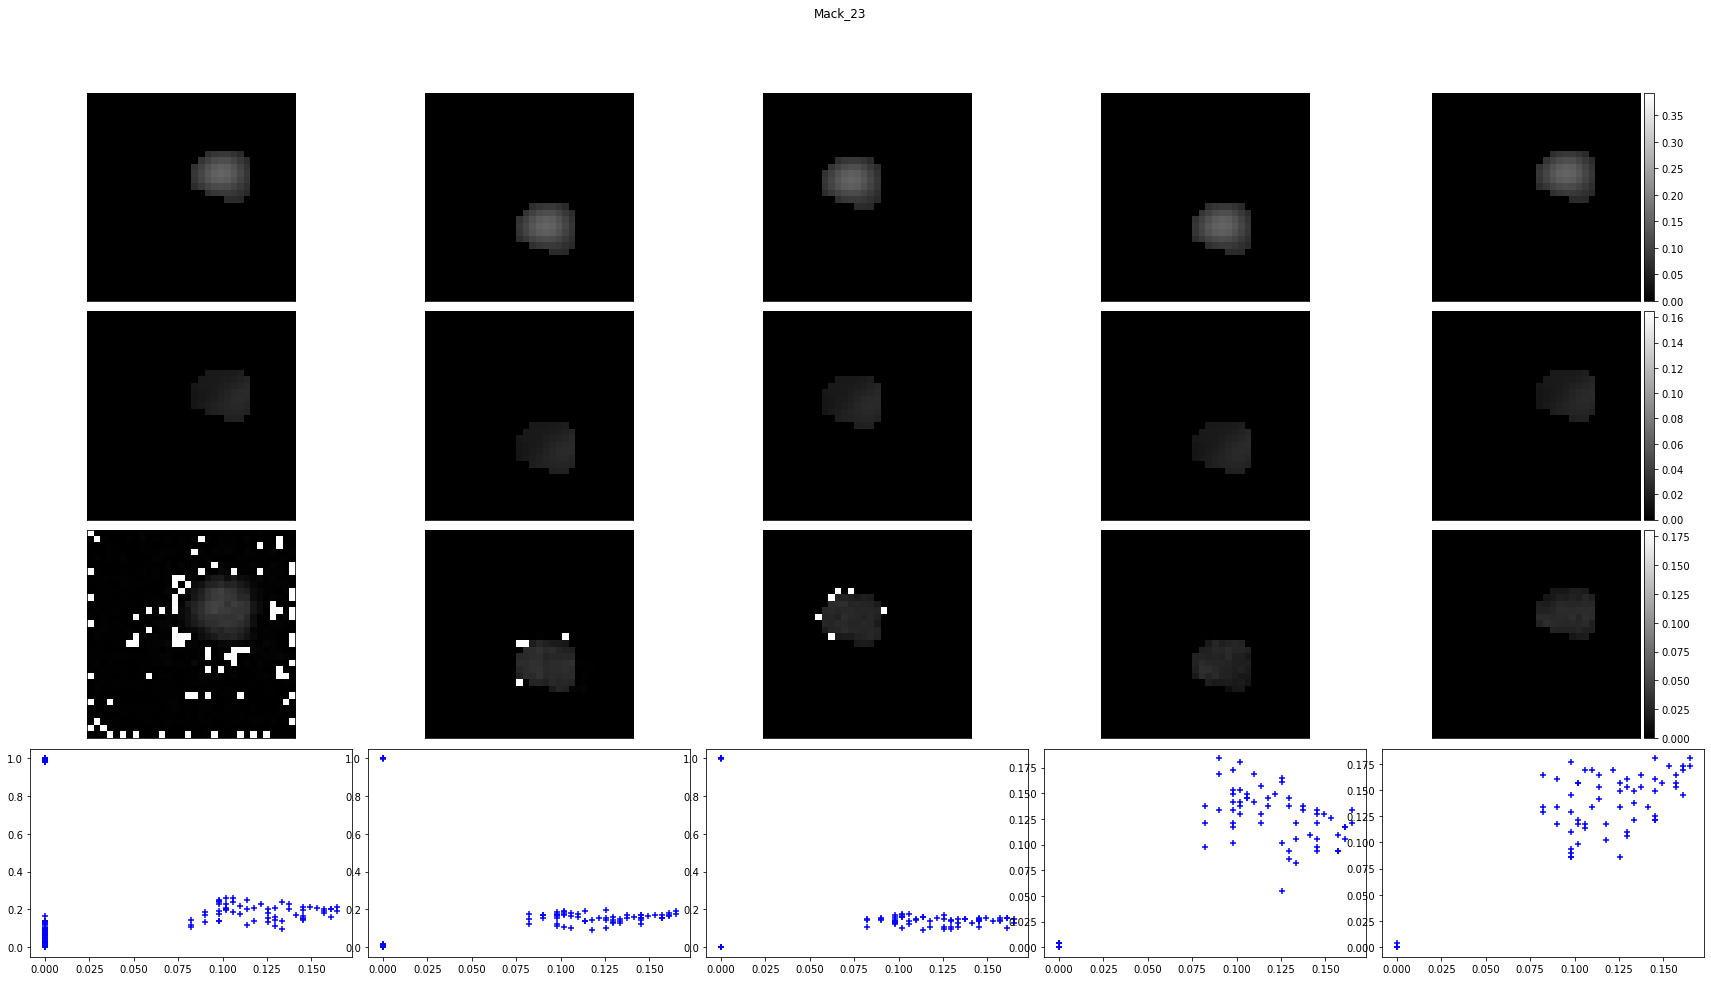

<Figure size 432x288 with 0 Axes>

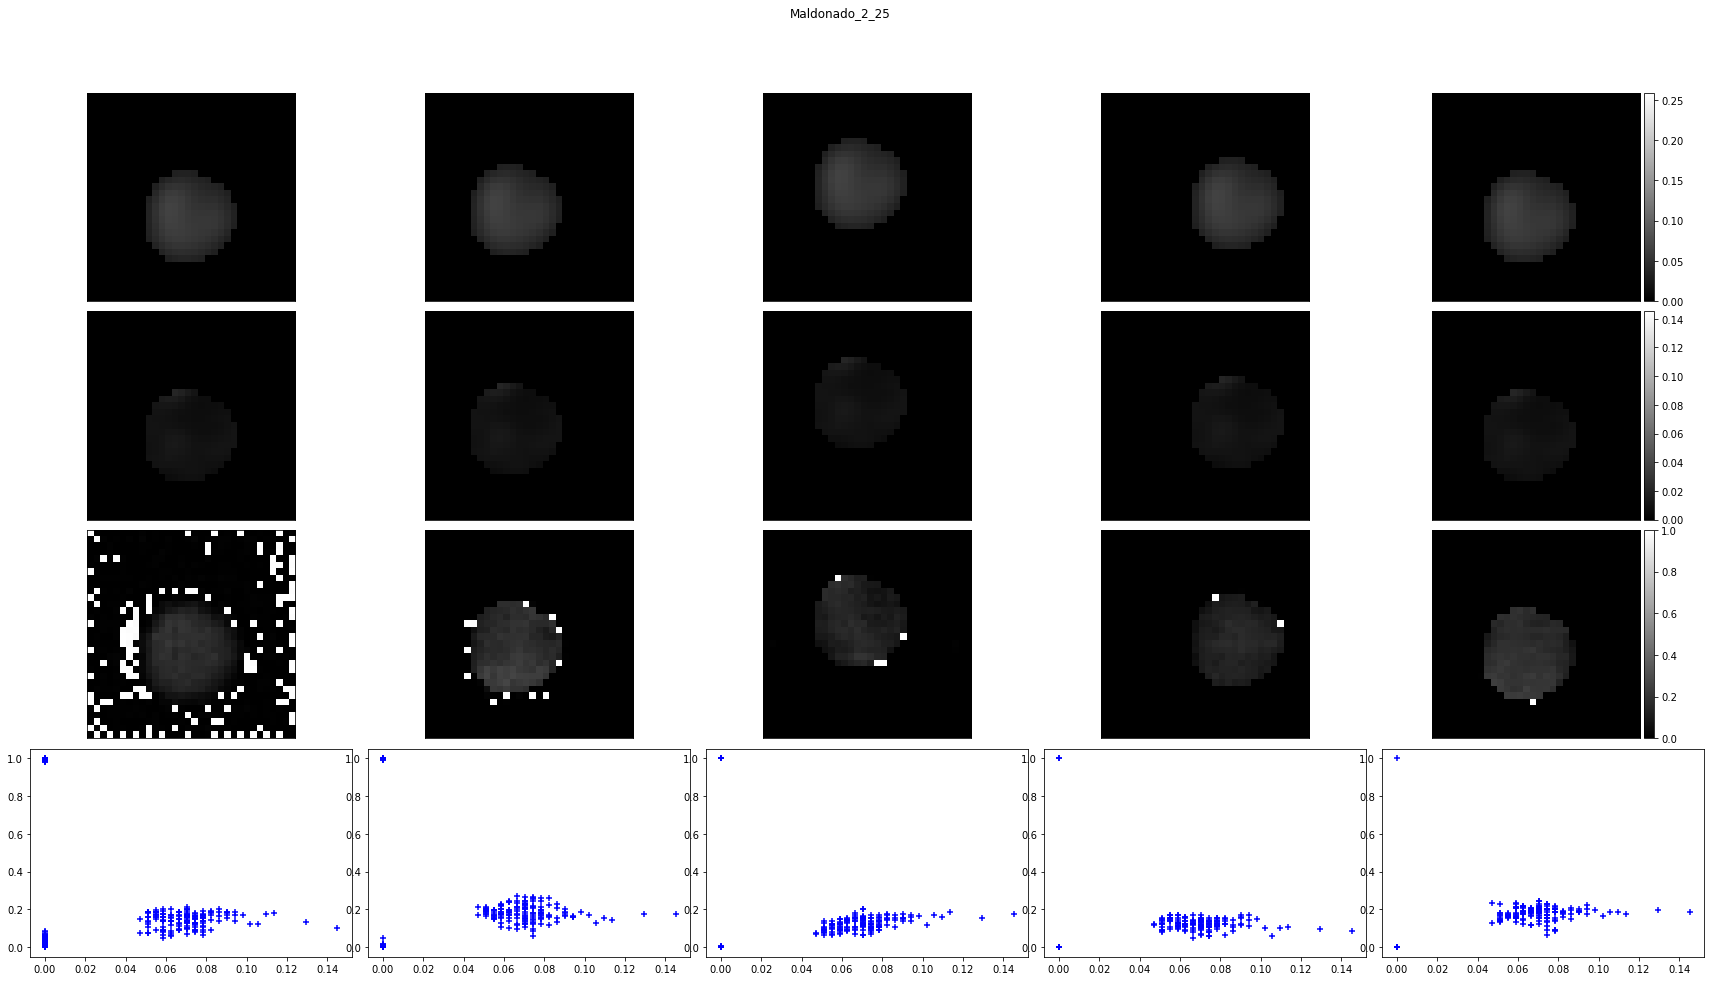

<Figure size 432x288 with 0 Axes>

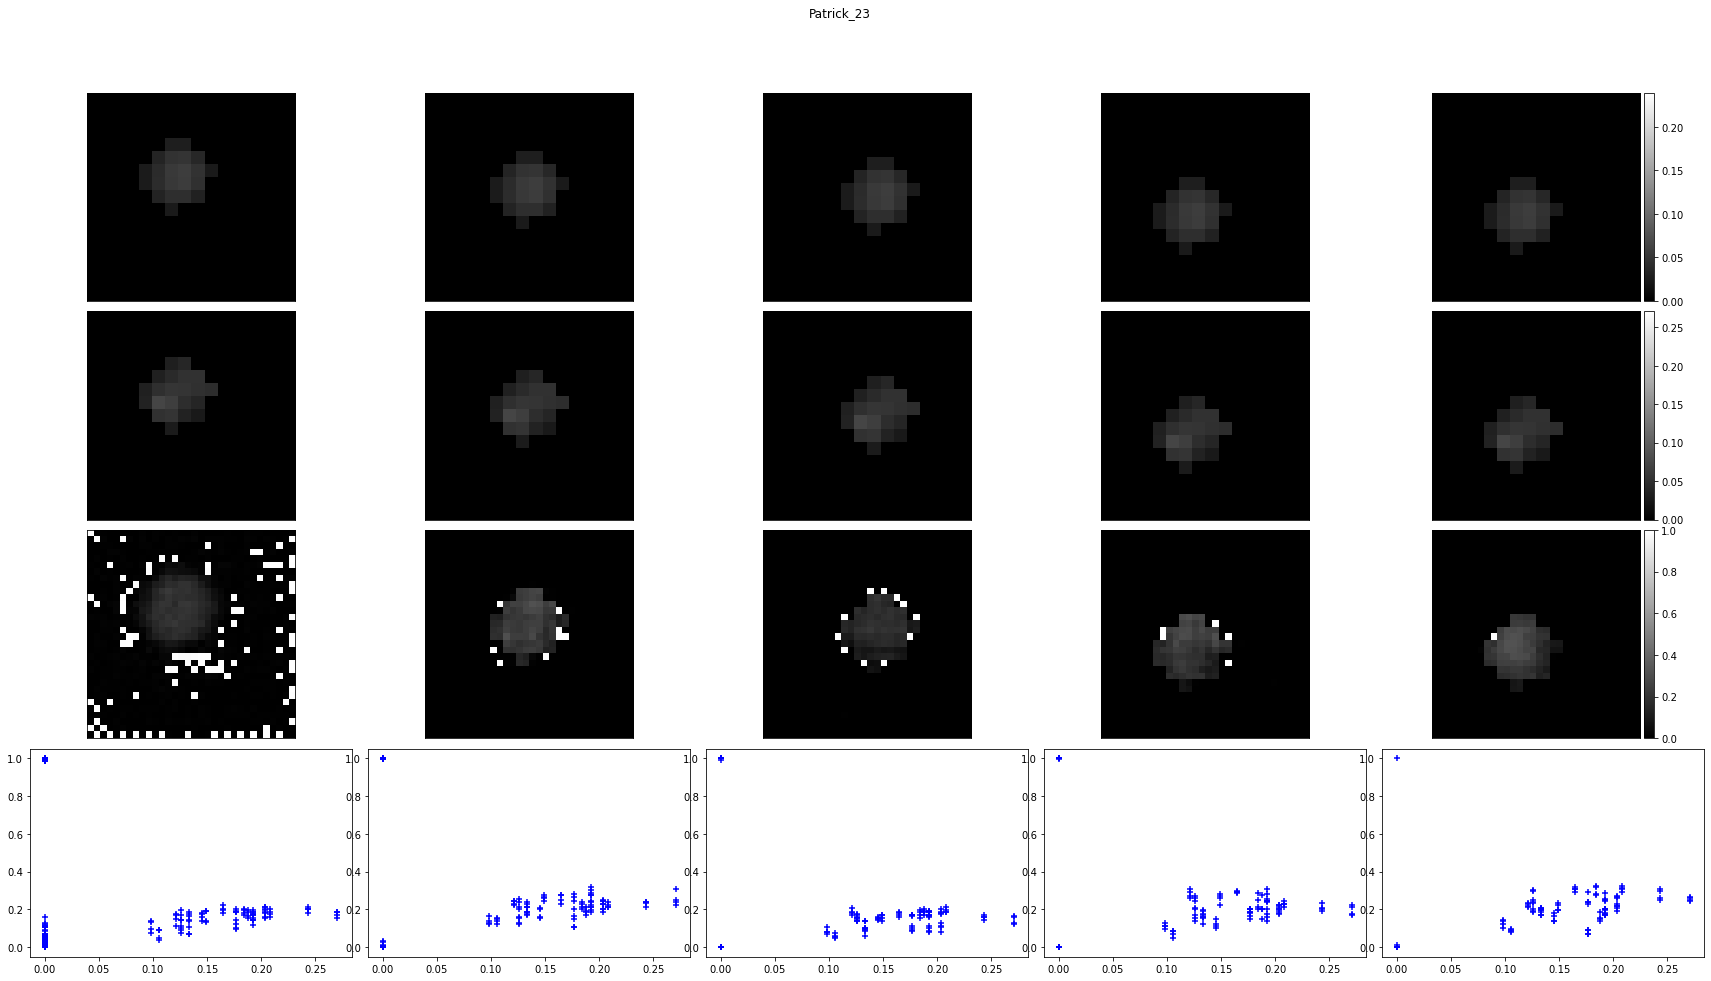

In [8]:
_, _, filenames = next(os.walk(real_k1_path), (None, None, []))
filenames.sort()
patientName = ['_'.join(x.split('_')[1:3]) if len(x.split('_')) ==6 else '_'.join(x.split('_')[1:4]) for x in filenames]
patientNameUnique = list(set(patientName))
patientNameUnique.sort()

epoch_number_to_plot = [1, 41, 71, 101, 161]
nCol = len(epoch_number_to_plot)

for patient in patientNameUnique[0::4]:
    plt.figure()
    fig, axs = plt.subplots(4, nCol, figsize=(30, 15))
    for col_id, epoch in enumerate(epoch_number_to_plot):
        name_real_FDG = os.path.join(real_FDG_path, 'FDGk1Pair_' + patient + '_real_A_epoch' + str(epoch) +'.png')
        name_real_k1 = os.path.join(real_k1_path, 'FDGk1Pair_' + patient + '_real_B_epoch' + str(epoch) +'.png')
        name_fake_k1 = os.path.join(fake_k1_path, 'FDGk1Pair_' + patient + '_fake_B_epoch' + str(epoch) +'.png')
        img_real_FDG = plt.imread(name_real_FDG)
        img_real_k1 = plt.imread(name_real_k1)
        img_fake_k1 = plt.imread(name_fake_k1)
        img_list = [img_real_FDG, img_real_k1, img_fake_k1]
        for row_id in range(4):
            ax = axs[row_id, col_id]
            if row_id < 3:
                im = ax.imshow(img_list[row_id], cmap='gray',)
                ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
                if col_id == len(epoch_number_to_plot) - 1:
                    divider = make_axes_locatable(ax)
                    cax = divider.append_axes("right", size="5%", pad=0.05)
                    # cax = plt.axes([0.85, 0.1, 0.075, 0.8])
                    fig.colorbar(im, cax=cax,)
            else:
                ax.scatter(img_list[1][:,:,0].reshape(32*32,), img_list[2][:,:,0].reshape(32*32,), c='b', marker='+',)
    fig.suptitle(patient)


    
    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.05)

In [9]:
file_dir = './checkpoints/fdg_fmisok1_pix2pix_no_margin_fold1_l1_l2_tumor_SE_16_wgangp'
mae_file = os.path.join(file_dir, 'mae_log.txt')
real_FDG_path = os.path.join(file_dir, 'train_real_A')
real_k1_path = os.path.join(file_dir, 'train_real_B')
fake_k1_path = os.path.join(file_dir, 'train_fake_B')
with open(mae_file) as f:
    lines = f.readlines()[1:]
    x = [int(line.split(',')[0].strip()) for line in lines]
    y = [float(line.split(',')[1].strip()) for line in lines]

In [10]:
min(y)

0.067136

In [11]:
y.index(min(y)) + 1

38

Text(0.5, 1.0, 'cross validation mae vs epoch')

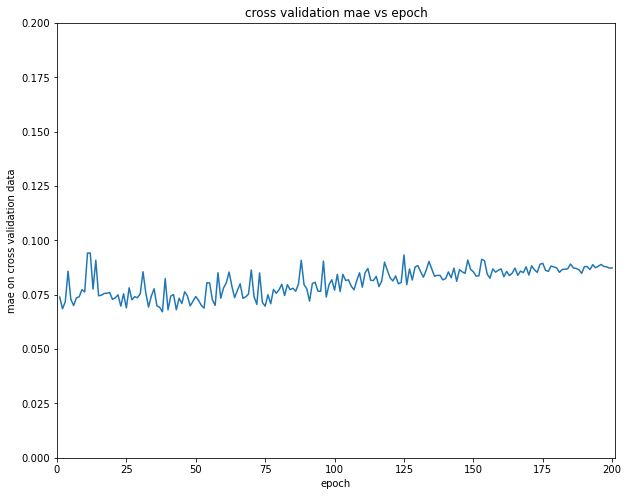

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x,y)
ax.set_xlim(0, 201)
ax.set_ylim(0, 0.2)
ax.set_xlabel('epoch')
ax.set_ylabel('mae on cross validation data')
ax.set_title('cross validation mae vs epoch')

<Figure size 432x288 with 0 Axes>

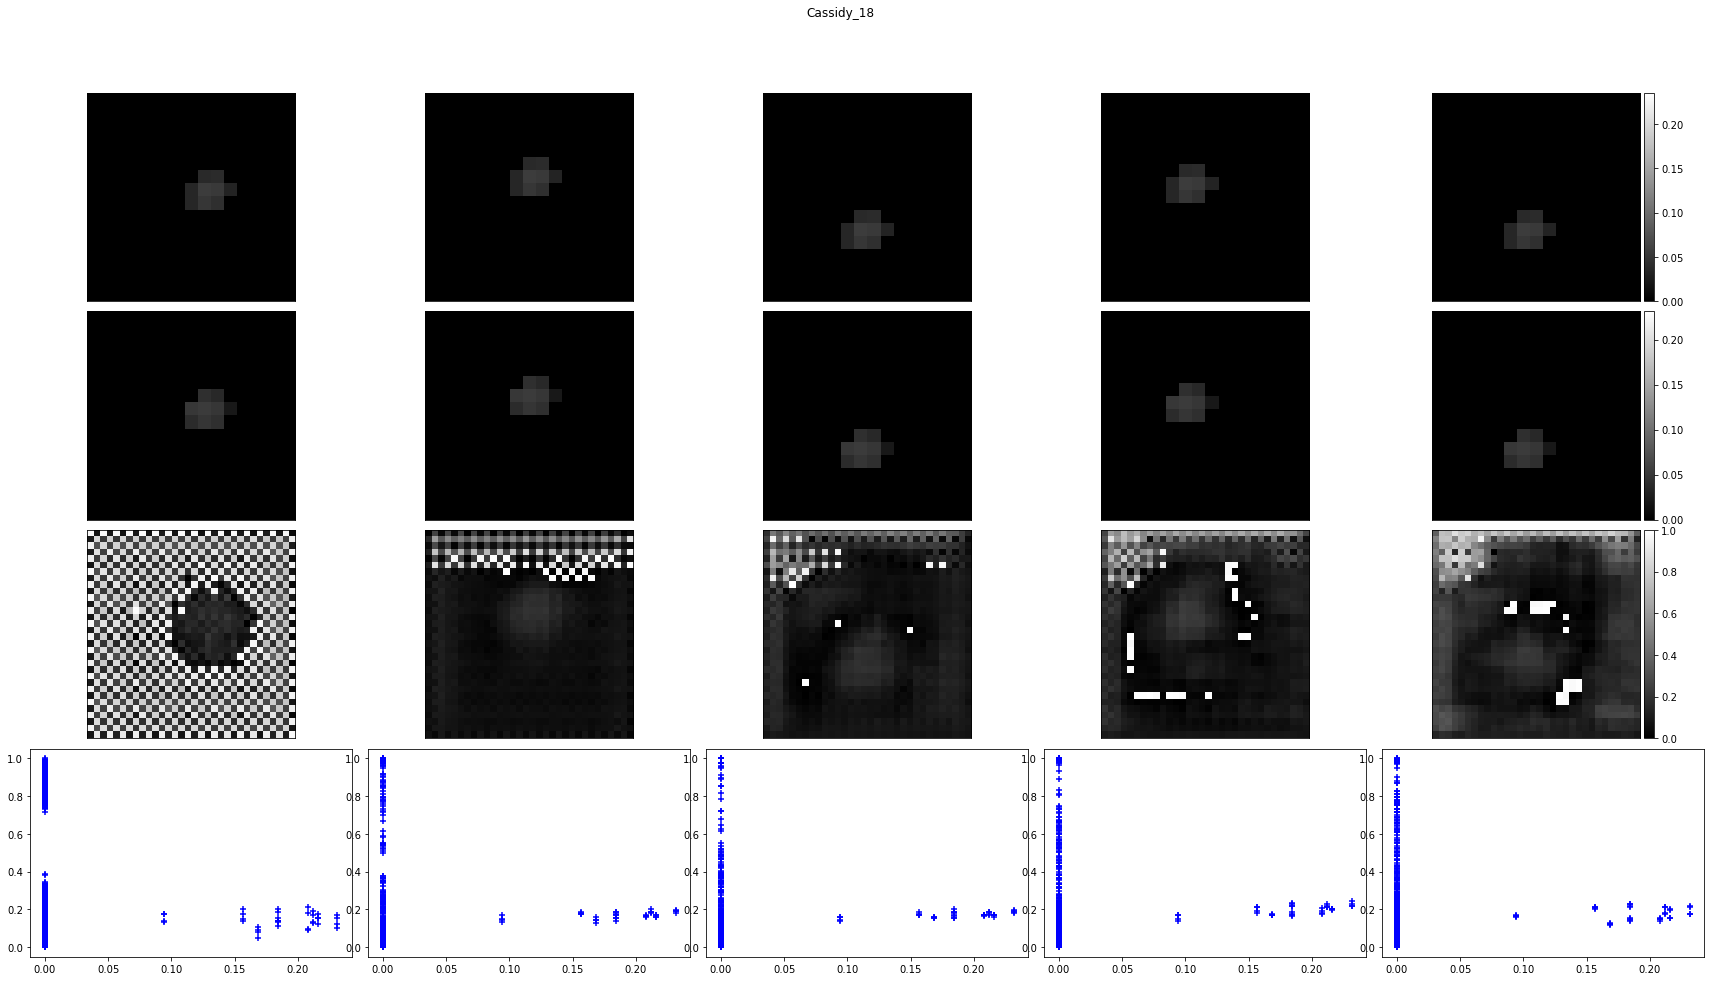

<Figure size 432x288 with 0 Axes>

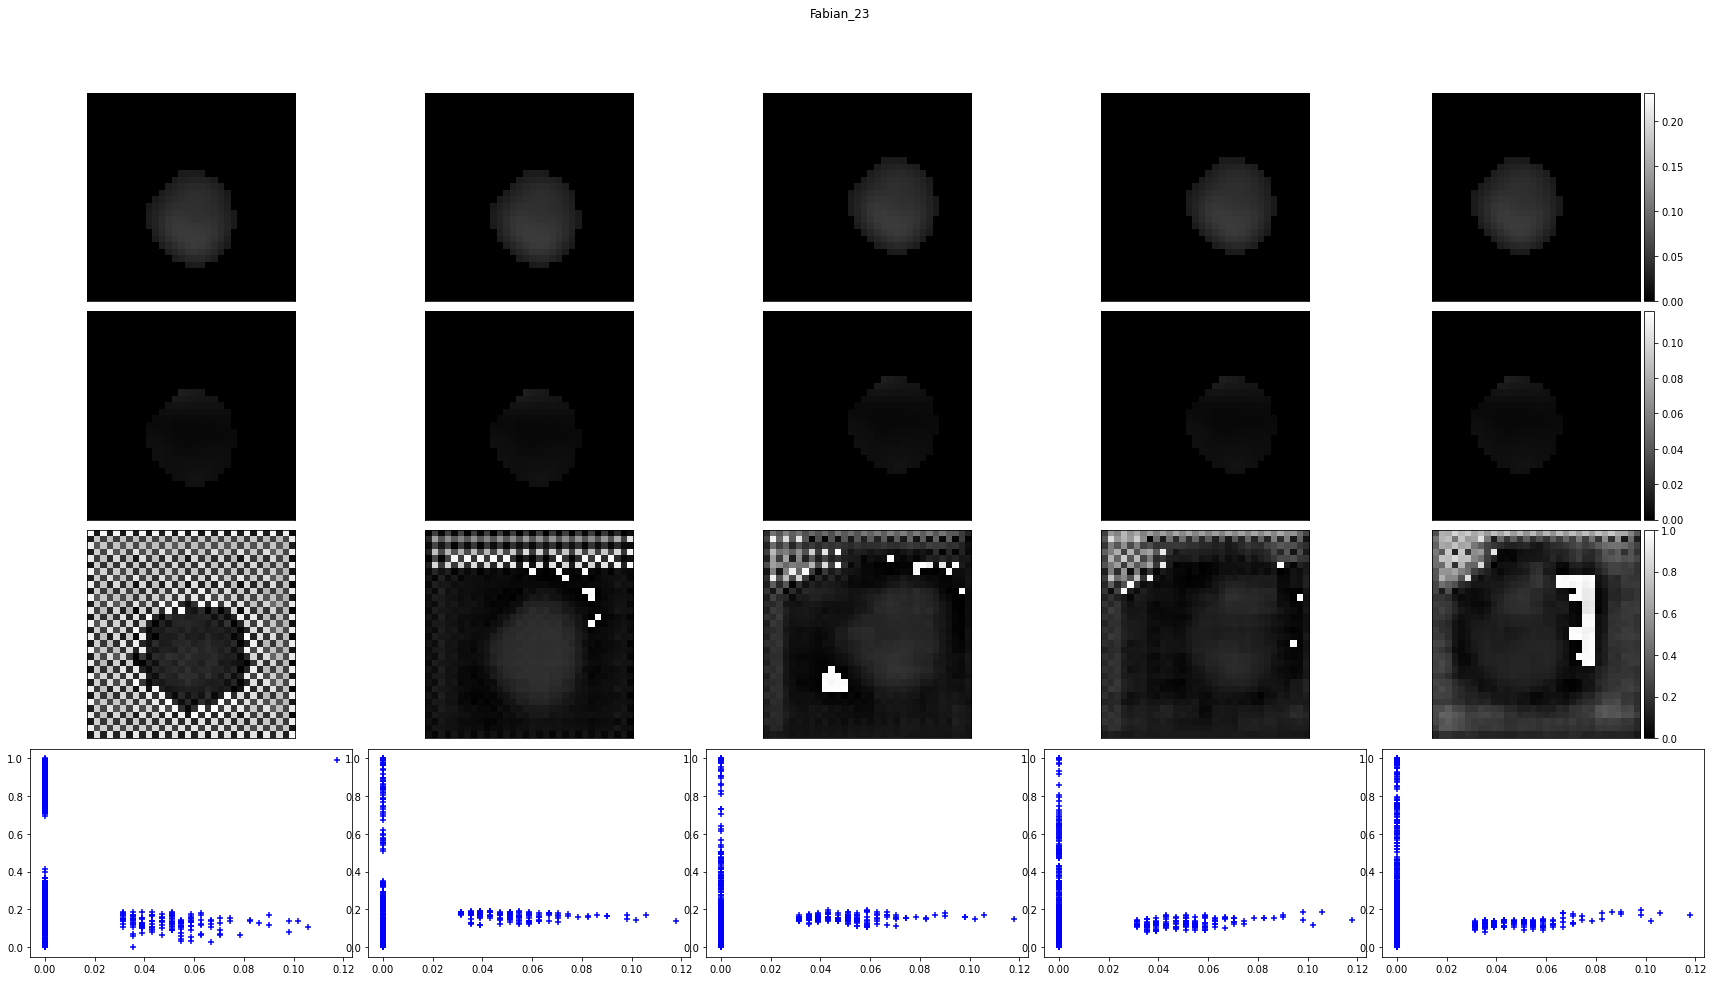

<Figure size 432x288 with 0 Axes>

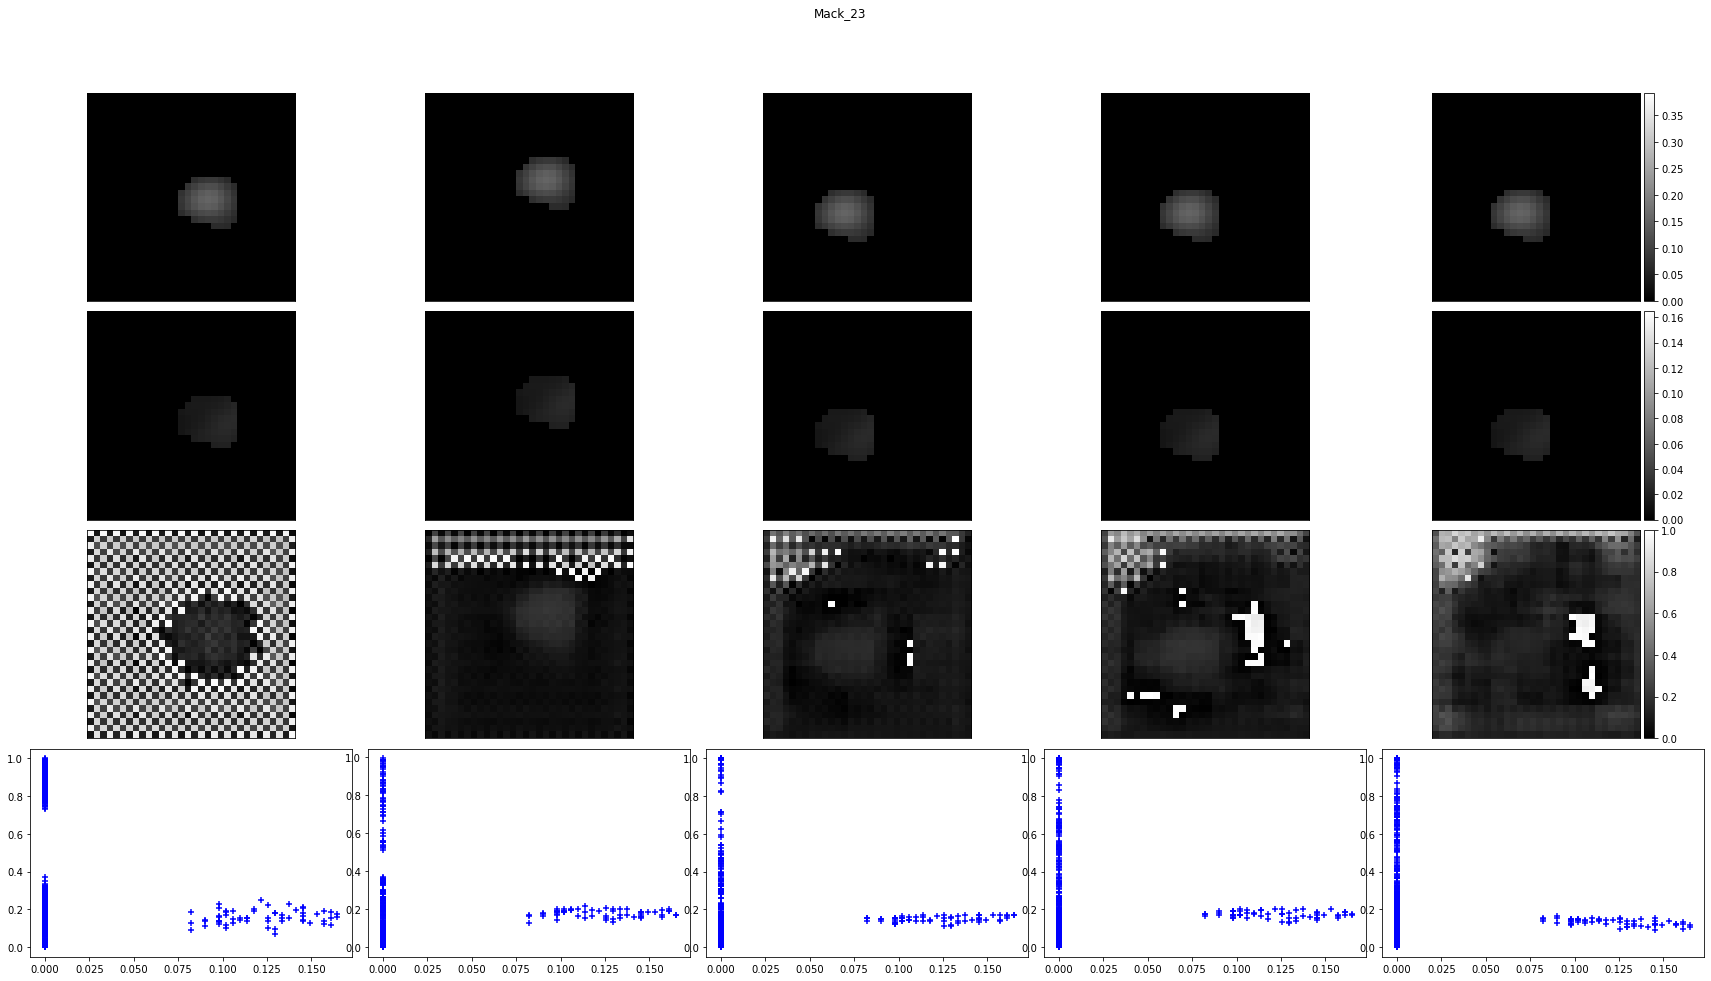

<Figure size 432x288 with 0 Axes>

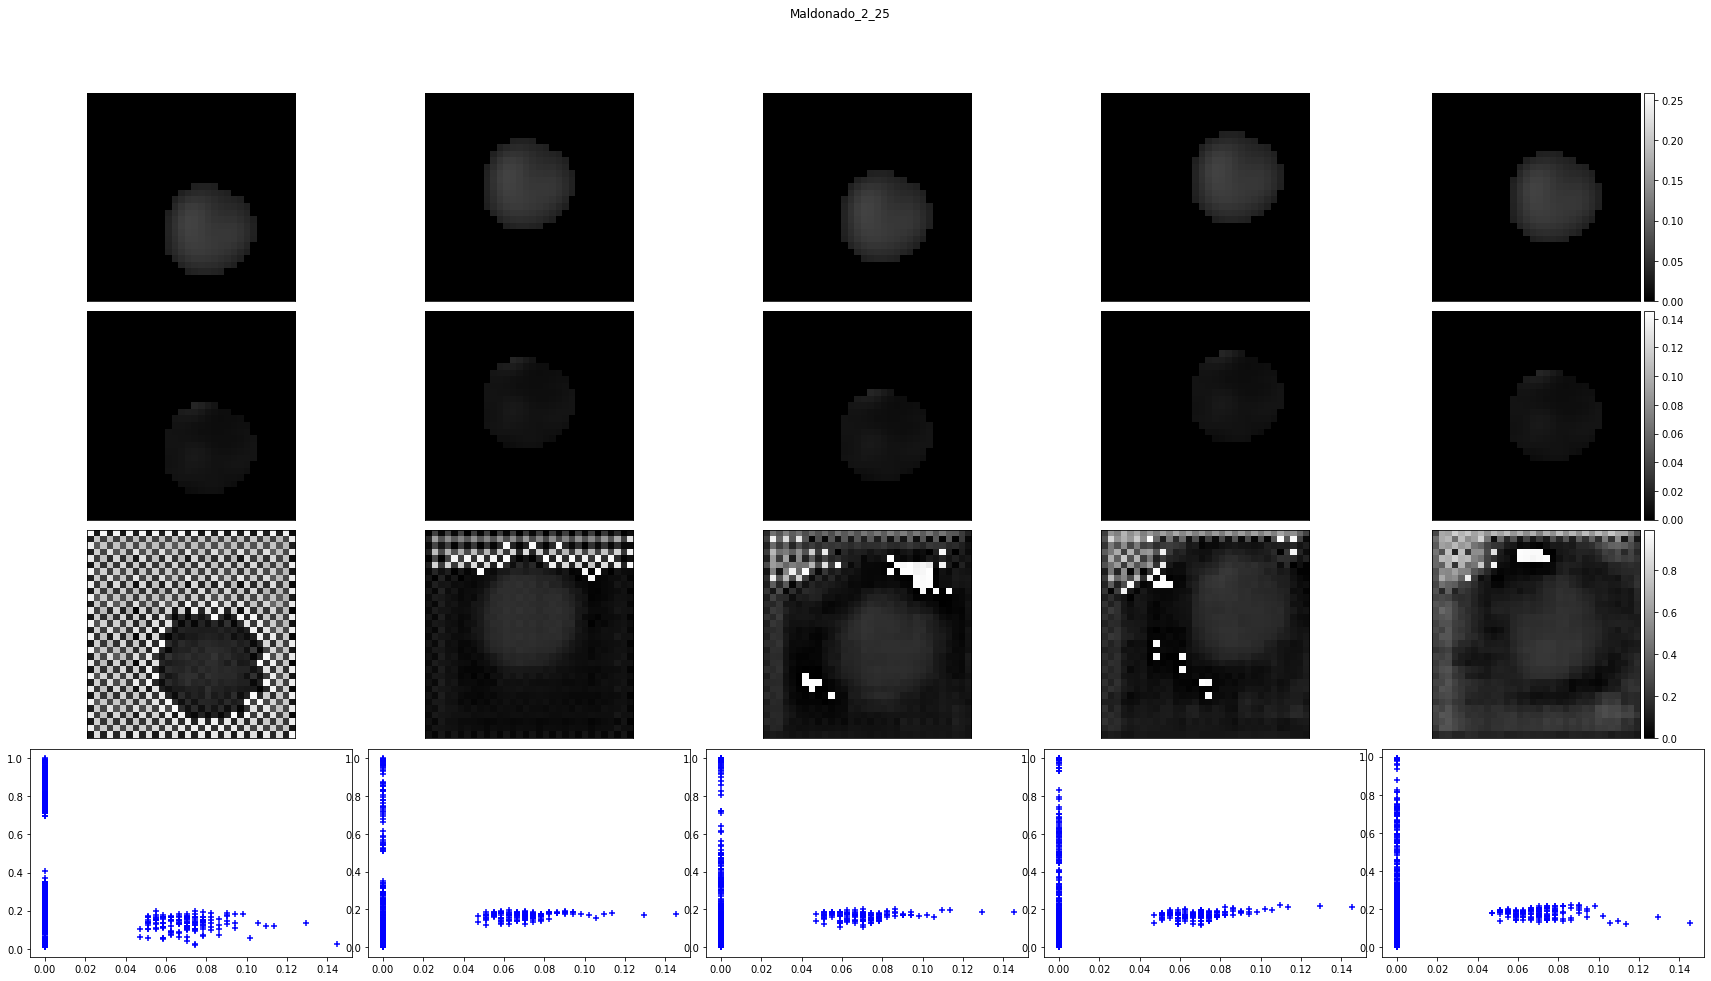

<Figure size 432x288 with 0 Axes>

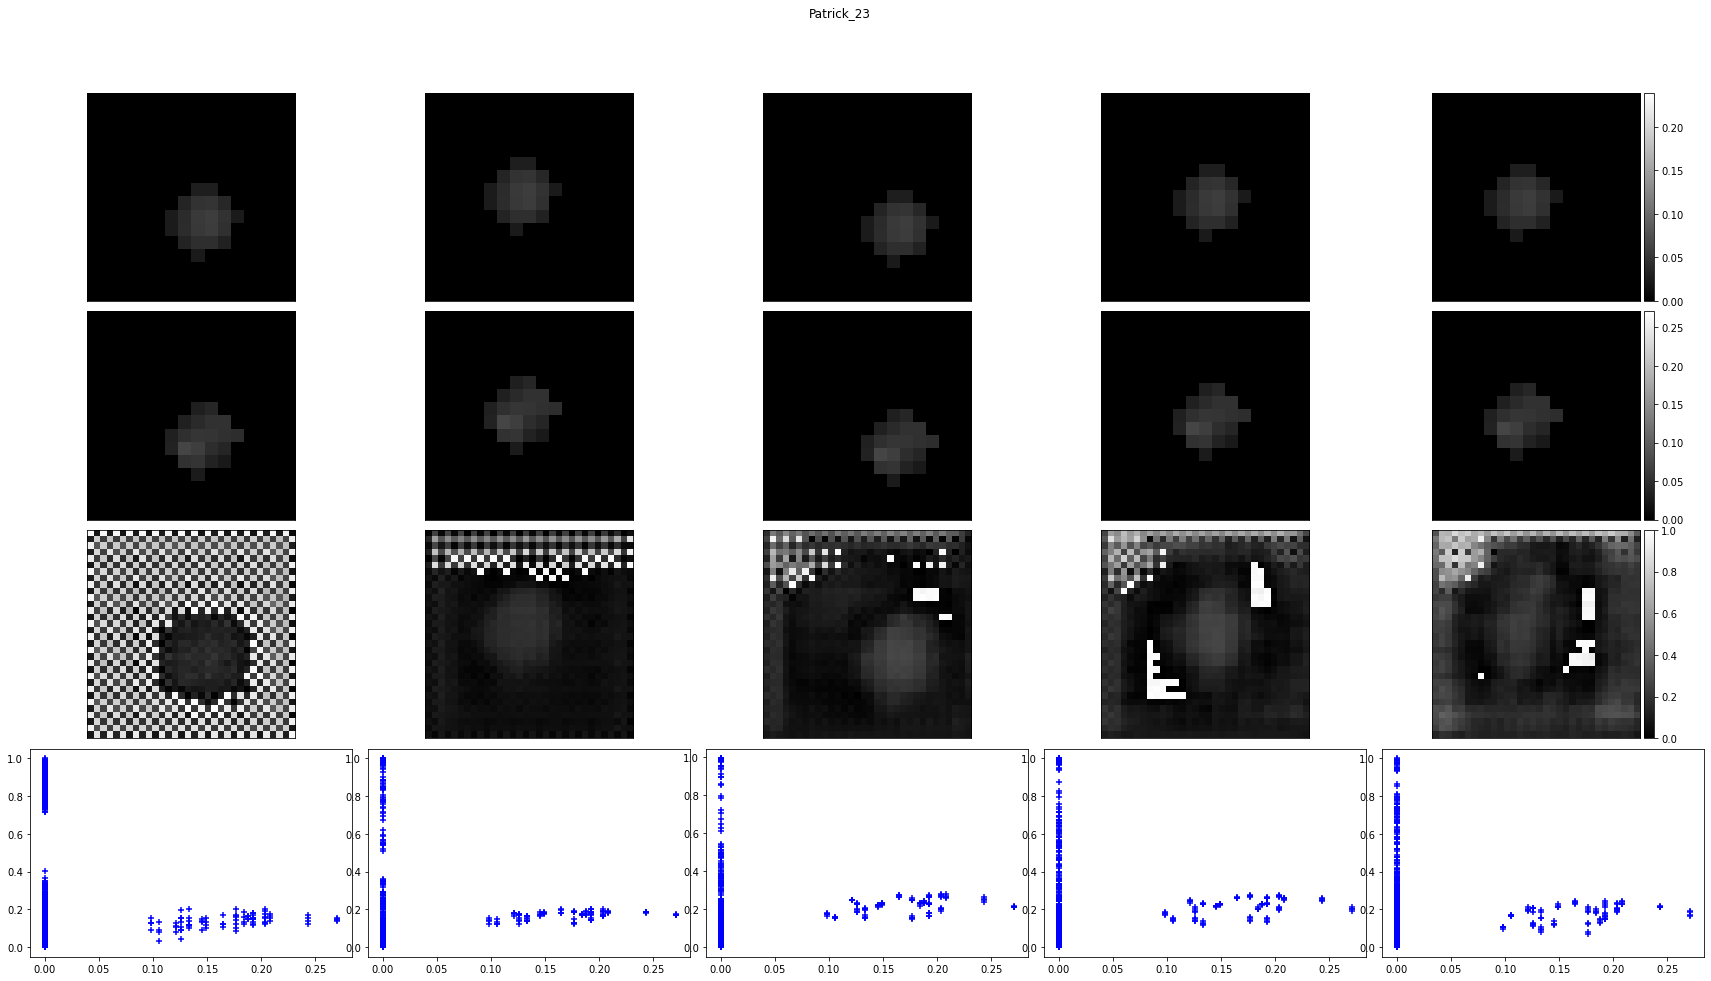

In [13]:
_, _, filenames = next(os.walk(real_k1_path), (None, None, []))
filenames.sort()
patientName = ['_'.join(x.split('_')[1:3]) if len(x.split('_')) ==6 else '_'.join(x.split('_')[1:4]) for x in filenames]
patientNameUnique = list(set(patientName))
patientNameUnique.sort()

epoch_number_to_plot = [1, 41, 71, 101, 161]
nCol = len(epoch_number_to_plot)

for patient in patientNameUnique[0::4]:
    plt.figure()
    fig, axs = plt.subplots(4, nCol, figsize=(30, 15))
    for col_id, epoch in enumerate(epoch_number_to_plot):
        name_real_FDG = os.path.join(real_FDG_path, 'FDGk1Pair_' + patient + '_real_A_epoch' + str(epoch) +'.png')
        name_real_k1 = os.path.join(real_k1_path, 'FDGk1Pair_' + patient + '_real_B_epoch' + str(epoch) +'.png')
        name_fake_k1 = os.path.join(fake_k1_path, 'FDGk1Pair_' + patient + '_fake_B_epoch' + str(epoch) +'.png')
        img_real_FDG = plt.imread(name_real_FDG)
        img_real_k1 = plt.imread(name_real_k1)
        img_fake_k1 = plt.imread(name_fake_k1)
        img_list = [img_real_FDG, img_real_k1, img_fake_k1]
        for row_id in range(4):
            ax = axs[row_id, col_id]
            if row_id < 3:
                im = ax.imshow(img_list[row_id], cmap='gray',)
                ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
                if col_id == len(epoch_number_to_plot) - 1:
                    divider = make_axes_locatable(ax)
                    cax = divider.append_axes("right", size="5%", pad=0.05)
                    # cax = plt.axes([0.85, 0.1, 0.075, 0.8])
                    fig.colorbar(im, cax=cax,)
            else:
                ax.scatter(img_list[1][:,:,0].reshape(32*32,), img_list[2][:,:,0].reshape(32*32,), c='b', marker='+',)
    fig.suptitle(patient)


    
    fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.05)

In [41]:
import torch
torch.logical_and(torch.tensor([[True, True],[False, False]]), torch.tensor([[True, False],[True, False]]))


tensor([[ True, False],
        [False, False]])